In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/dogs-vs-cats.zip

Archive:  /content/drive/MyDrive/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip /content/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [ ]:
!unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=667, end_index=1667)
make_subset("validation", start_index=1668, end_index=2168)
make_subset("test", start_index=2169, end_index=2669)

We use the regularization strategy in the DATA PREPROCESSING stage because we are concerned that the model might overfit. Each image is converted into a tensor in this instance.

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

tr_d = image_dataset_from_directory(
 new_base_dir / "train",
 image_size=(180, 180),
 batch_size=32)
valid_d= image_dataset_from_directory(
 new_base_dir / "validation",
 image_size=(180, 180),
 batch_size=32)
tes_d= image_dataset_from_directory(
 new_base_dir / "test",
 image_size=(180, 180),
 batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
in1 = keras.Input(shape=(180, 180, 3))
p = layers.Rescaling(1./255)(in1)
p = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(p)
p = layers.MaxPooling2D(pool_size=2)(p)
p = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(p)
p = layers.MaxPooling2D(pool_size=2)(p)
p = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(p)
p = layers.MaxPooling2D(pool_size=2)(p)
p = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(p)
p = layers.MaxPooling2D(pool_size=2)(p)
p = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(p)
p = layers.Flatten()(p)
out1 = layers.Dense(1, activation="sigmoid")(p)
model1 = keras.Model(inputs=in1, outputs=out1)

In [ ]:
model1.compile(loss="binary_crossentropy",
 optimizer="adam",
 metrics=["accuracy"])


In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

Callback can be used to store the model's weights at the conclusion of each epoch or to stop training the model early if it is not improving. Additionally, callbacks can be used to schedule learning rate adjustments, record metrics, and show the model's success.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
callback1 = [
 keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch.keras",
 save_best_only=True,
 monitor="val_loss")
]
history1 = model1.fit(
 tr_d,
 epochs=10,
 validation_data=valid_d,
 callbacks=callback1)

Epoch 1/10
63/63 [==============================] - 8s 31ms/step - loss: 0.7064 - accuracy: 0.4970 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 1s 16ms/step - loss: 0.6945 - accuracy: 0.5145 - val_loss: 0.6915 - val_accuracy: 0.5060
Epoch 3/10
63/63 [==============================] - 1s 15ms/step - loss: 0.6927 - accuracy: 0.5030 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 1s 15ms/step - loss: 0.6945 - accuracy: 0.5210 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 1s 15ms/step - loss: 0.6938 - accuracy: 0.5050 - val_loss: 0.6924 - val_accuracy: 0.5370
Epoch 6/10
63/63 [==============================] - 1s 16ms/step - loss: 0.6858 - accuracy: 0.5540 - val_loss: 0.6838 - val_accuracy: 0.5300
Epoch 7/10
63/63 [==============================] - 1s 16ms/step - loss: 0.6661 - accuracy: 0.5920 - val_loss: 0.6748 - val_accuracy: 0.5680
Epoch 8/10
63

It can be observed that as the number of epochs increases, accuracy is seen to increase
Accuracy=66% Val_acc=64.5% test accuracy=64.2%


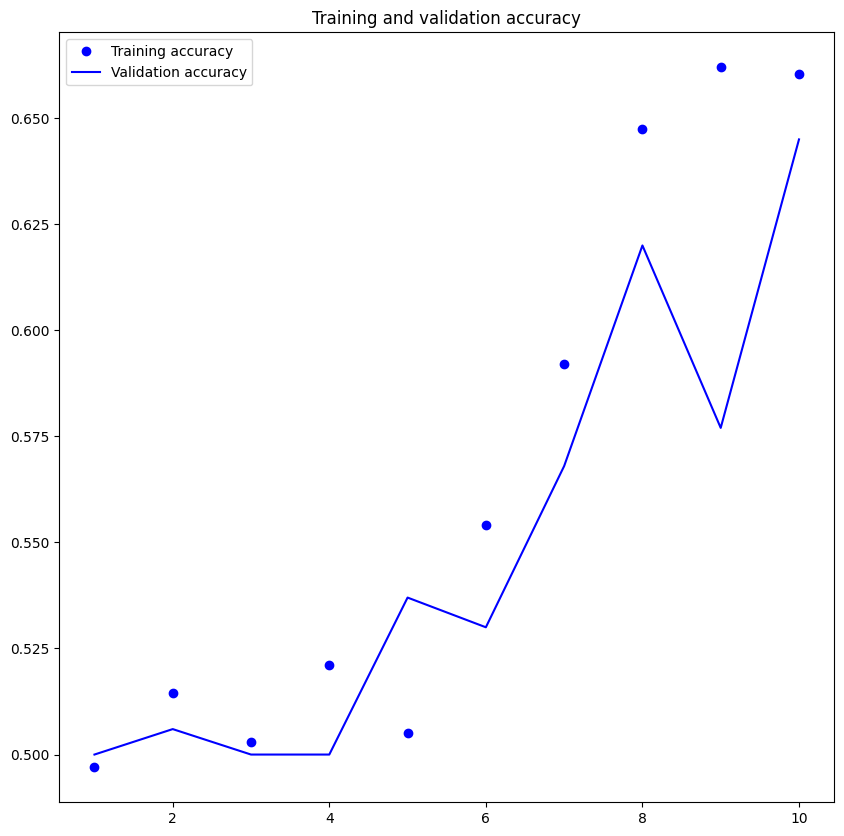

<Figure size 640x480 with 0 Axes>

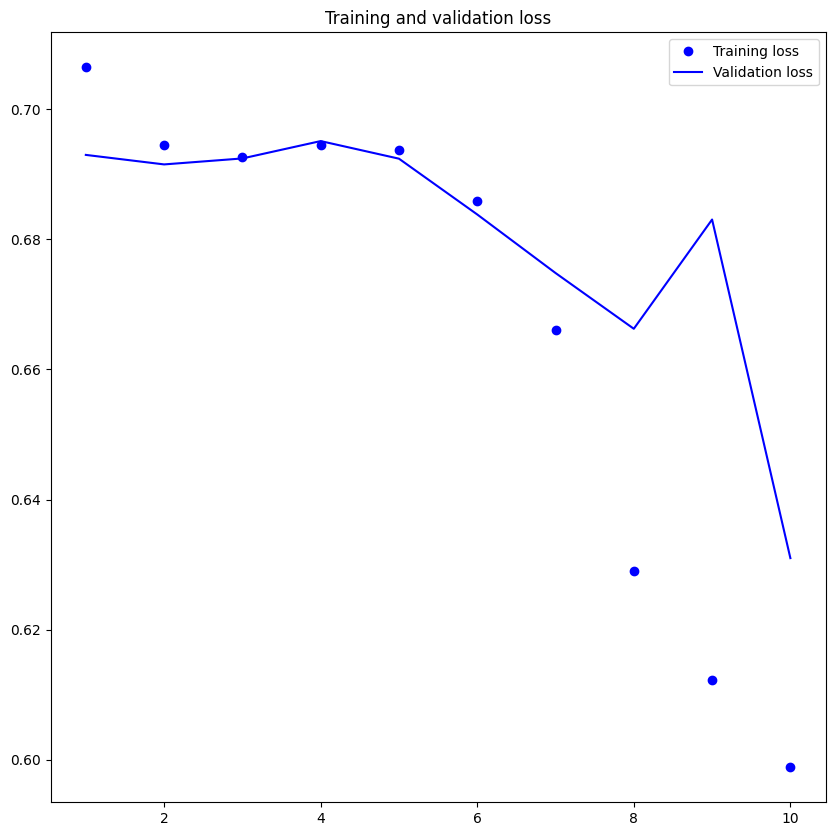

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
accuracy1 = history1.history["accuracy"]
val_accuracy1 = history1.history["val_accuracy"]
loss1 = history1.history["loss"]
val_loss1 = history1.history["val_loss"]
epochs = range(1, len(accuracy1) + 1)
plt.plot(epochs, accuracy1, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy1, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss1, "bo", label="Training loss")
plt.plot(epochs, val_loss1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
acc_tes1 = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = acc_tes1.evaluate(tes_d)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 7ms/step - loss: 0.6393 - accuracy: 0.6420
Test accuracy: 0.642


Test accuracy with no data augmentation=64.2%

Q2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above.
Optimize your network (again training from scratch). What performance did you achieve?


A method called "data augmentation" makes new, altered versions of the original data in order to expand the size of a training set.
This enhances the model's capacity for generalization and lessens overfitting.

In [ ]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1500 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=667, end_index=2167)
make_subset("validation", start_index=2168, end_index=2668)
make_subset("test", start_index=2669, end_index=3168)

In [ ]:
augment_data = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)


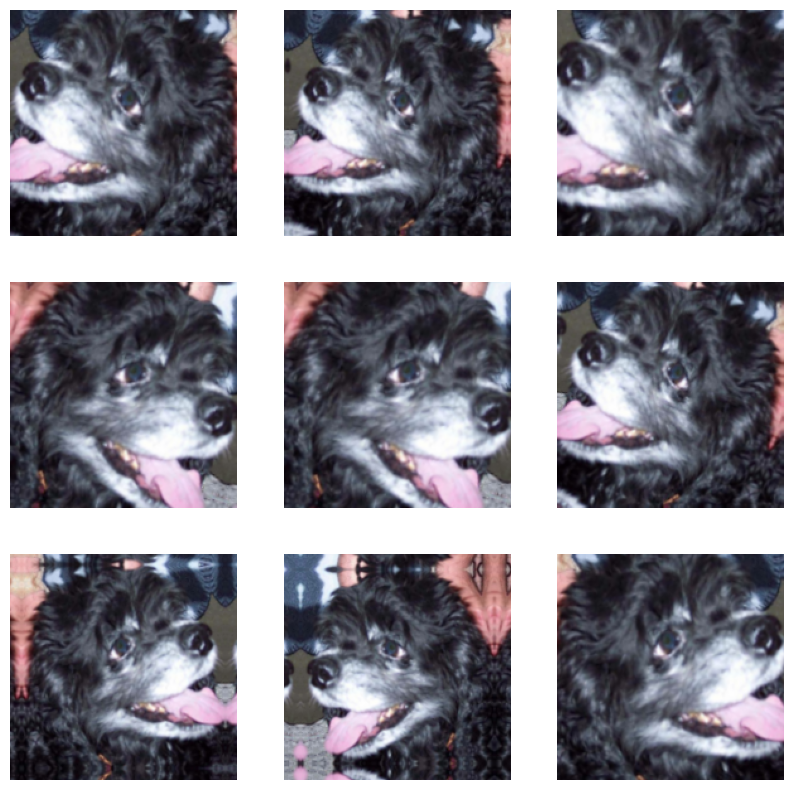

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in tr_d.take(1):
 for i in range(9):
  augmentation = augment_data(images)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmentation[0].numpy().astype("uint8"))
  plt.axis("off")

newly developed convolutional neural network with picture augmentation and dropout

In [ ]:
inp2 = keras.Input(shape=(180, 180, 3))
p2 = augment_data(inp2)
p2 = layers.Rescaling(1./255)(p2)
p2 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(p2)
p2 = layers.MaxPooling2D(pool_size=2)(p2)
p2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(p2)
p2 = layers.MaxPooling2D(pool_size=2)(p2)
p2 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(p2)
p2 = layers.MaxPooling2D(pool_size=2)(p2)
p2 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(p2)
p2 = layers.MaxPooling2D(pool_size=2)(p2)
p2 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(p2)
p2 = layers.Flatten()(p2)
p2 = layers.Dropout(0.5)(p2)
outp2 = layers.Dense(1, activation="sigmoid")(p2)
modep2 = keras.Model(inputs=inp2, outputs=outp2)
modep2.compile(loss="binary_crossentropy",
 optimizer="adam",
 metrics=["accuracy"])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
callb2 = [
 keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch_with_augment_data.keras",
 save_best_only=True,
 monitor="val_loss")
]
history2 = modep2.fit(
 tr_d,
 epochs=300,
 validation_data=valid_d,
 callbacks=callb2)

Epoch 1/300
63/63 [==============================] - 4s 20ms/step - loss: 0.6946 - accuracy: 0.5010 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 2/300
63/63 [==============================] - 1s 17ms/step - loss: 0.6899 - accuracy: 0.5410 - val_loss: 0.6882 - val_accuracy: 0.5450
Epoch 3/300
63/63 [==============================] - 1s 18ms/step - loss: 0.6829 - accuracy: 0.5625 - val_loss: 0.6686 - val_accuracy: 0.6050
Epoch 4/300
63/63 [==============================] - 1s 17ms/step - loss: 0.6700 - accuracy: 0.5955 - val_loss: 0.6465 - val_accuracy: 0.6320
Epoch 5/300
63/63 [==============================] - 1s 16ms/step - loss: 0.6475 - accuracy: 0.6375 - val_loss: 0.6863 - val_accuracy: 0.5850
Epoch 6/300
63/63 [==============================] - 1s 18ms/step - loss: 0.6598 - accuracy: 0.6085 - val_loss: 0.6303 - val_accuracy: 0.6510
Epoch 7/300
63/63 [==============================] - 1s 16ms/step - loss: 0.6333 - accuracy: 0.6340 - val_loss: 0.6633 - val_accuracy: 0.6190
Epoch 

In [ ]:
acctes2 = keras.models.load_model(
 "convnet_from_scratch_with_augment_data.keras")
test_loss, test_acc = acctes2.evaluate(tes_d)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 1s 7ms/step - loss: 0.4425 - accuracy: 0.7850
Test accuracy: 0.785


Q3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size
may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best
prediction results.



 Training sample to 2000 while maintaining the 500-sample validation and test sets

In [ ]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 2000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=667, end_index=2667)
make_subset("validation", start_index=2668, end_index=3168)
make_subset("test", start_index=3169, end_index=3669)

In [ ]:
inp3 = keras.Input(shape=(180, 180, 3))
p3 = augment_data(inp3)
p3 = layers.Rescaling(1./255)(p3)
p3 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(p3)
p3 = layers.MaxPooling2D(pool_size=2)(p3)
p3 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(p3)
p3 = layers.MaxPooling2D(pool_size=2)(p3)
p3 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(p3)
p3 = layers.MaxPooling2D(pool_size=2)(p3)
p3 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(p3)
p3 = layers.MaxPooling2D(pool_size=2)(p3)
p3 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(p3)
p3 = layers.Flatten()(p3)
p3 = layers.Dropout(0.5)(p3)
outp3 = layers.Dense(1, activation="sigmoid")(p3)
modep3 = keras.Model(inputs=inp3, outputs=outp3)
modep3.compile(loss="binary_crossentropy",
 optimizer="adam",
 metrics=["accuracy"])


In [ ]:
callbp3 = [
 keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch_with_augment_data.keras",
 save_best_only=True,
 monitor="val_loss")
]
hist3 = modep3.fit(
 tr_d,
 epochs=50,
 validation_data=valid_d,
 callbacks=callbp3)

Epoch 1/50
63/63 [==============================] - 3s 21ms/step - loss: 0.6950 - accuracy: 0.4815 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 1s 19ms/step - loss: 0.6918 - accuracy: 0.5195 - val_loss: 0.6869 - val_accuracy: 0.5360
Epoch 3/50
63/63 [==============================] - 1s 17ms/step - loss: 0.6886 - accuracy: 0.5440 - val_loss: 0.6875 - val_accuracy: 0.5370
Epoch 4/50
63/63 [==============================] - 1s 18ms/step - loss: 0.6932 - accuracy: 0.5215 - val_loss: 0.6801 - val_accuracy: 0.5760
Epoch 5/50
63/63 [==============================] - 1s 18ms/step - loss: 0.6758 - accuracy: 0.5885 - val_loss: 0.6675 - val_accuracy: 0.5940
Epoch 6/50
63/63 [==============================] - 1s 18ms/step - loss: 0.6661 - accuracy: 0.5925 - val_loss: 0.6424 - val_accuracy: 0.6310
Epoch 7/50
63/63 [==============================] - 1s 17ms/step - loss: 0.6514 - accuracy: 0.6185 - val_loss: 0.6618 - val_accuracy: 0.6010
Epoch 8/50
63

In [ ]:

acc_tesp3 = keras.models.load_model(
 "convnet_from_scratch_with_augment_data.keras")
test_loss, test_acc = acc_tesp3.evaluate(tes_d)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 1s 7ms/step - loss: 0.4350 - accuracy: 0.8190
Test accuracy: 0.819


Q4.Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use inSteps 2 and 3 for the pretrained network may be the same or different from those using
the network where you trained from scratch. Again, use any and all optimization
techniques to get best performance.




Instantiating the VGG16 convolutional base

In [ ]:
convolute_bas = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False,
 input_shape=(180, 180, 3))


58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
convolute_bas.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
import numpy as np
def get_features_and_labels(dataset):
 all_feature = []
 all_label = []
 for images, labels in dataset:
  preprocessed_images = keras.applications.vgg16.preprocess_input(images)
  features = convolute_bas.predict(preprocessed_images)
  all_feature.append(features)
  all_label.append(labels)
  return np.concatenate(all_feature), np.concatenate(all_label)

train_features, train_labels = get_features_and_labels(tr_d)
val_features, val_labels = get_features_and_labels(valid_d)
test_features, test_labels = get_features_and_labels(tes_d)

1/1 [==============================] - 0s 24ms/step


In [ ]:
train_features.shape

(32, 5, 5, 512)

In [ ]:
inp4=keras.Input(shape=(5, 5, 512))
p4=layers.Flatten()(inp4)
p4=layers.Dense(256)(p4)
p4 = layers.Dropout(0.5)(p4)
outp46 = layers.Dense(1, activation="sigmoid")(p4)
modep6 = keras.Model(inp4, outp46)
modep6.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])
call6 = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction.keras",
 save_best_only=True,
 monitor="val_loss")
]
history4 = modep6.fit(
 train_features, train_labels,
 epochs=20,
 validation_data=(val_features, val_labels),
 callbacks=call6)

Epoch 1/20
1/1 [==============================] - 1s 966ms/step - loss: 21.4155 - accuracy: 0.5000 - val_loss: 89.2501 - val_accuracy: 0.6875
Epoch 2/20
1/1 [==============================] - 0s 154ms/step - loss: 61.7129 - accuracy: 0.8438 - val_loss: 38.0475 - val_accuracy: 0.7500
Epoch 3/20
1/1 [==============================] - 0s 34ms/step - loss: 28.5351 - accuracy: 0.7812 - val_loss: 41.9219 - val_accuracy: 0.8125
Epoch 4/20
1/1 [==============================] - 0s 144ms/step - loss: 6.2611 - accuracy: 0.9688 - val_loss: 19.5806 - val_accuracy: 0.8750
Epoch 5/20
1/1 [==============================] - 0s 33ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 19.5806 - val_accuracy: 0.8750
Epoch 6/20
1/1 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 19.5806 - val_accuracy: 0.8750
Epoch 7/20
1/1 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 19.5806 - val_accuracy: 0.8750
Ep

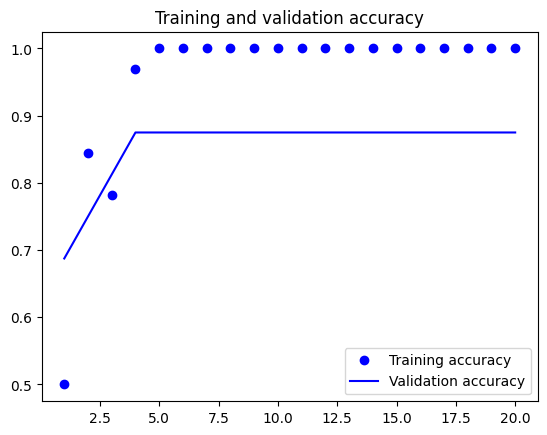

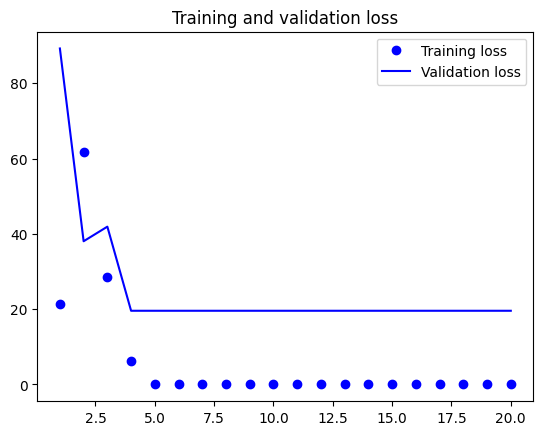

In [ ]:

import matplotlib.pyplot as plt
accu4 = history4.history["accuracy"]
valacc4 = history4.history["val_accuracy"]
lo4 = history4.history["loss"]
vallo4 = history4.history["val_loss"]
epochs = range(1, len(accu4) + 1)
plt.plot(epochs, accu4, "bo", label="Training accuracy")
plt.plot(epochs, valacc4, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, lo4, "bo", label="Training loss")
plt.plot(epochs, vallo4, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
convolut_bas = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False)
convolut_bas.trainable = False
convolut_bas.trainable = True
print("This is the number of trainable weights "
 "before freezing the conv base:", len(convolut_bas.trainable_weights))
convolut_bas.trainable = False
print("This is the number of trainable weights "
 "after freezing the conv base:", len(convolut_bas.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


Model is now performing with a classifier and agumentation to convulation base

In [ ]:
augment2 = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)
inpup21 = keras.Input(shape=(180, 180, 3))
p21 = augment2(inpup21)
p21 =keras.layers.Lambda(
 lambda x: keras.applications.vgg16.preprocess_input(x))(p21)
p21 = convolut_bas(p21)
p21 = layers.Flatten()(p21)
p21 = layers.Dense(256)(p21)
p21 = layers.Dropout(0.5)(p21)
outpu21 = layers.Dense(1, activation="sigmoid")(p21)
model4 = keras.Model(inpup21, outpu21)
model4.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [ ]:
callback4 = [
 keras.callbacks.ModelCheckpoint(
 filepath="features_extraction_with_augmentation2.keras",
 save_best_only=True,
 monitor="val_loss"
 )
]
history4 = model4.fit(
 tr_d,
 epochs=10,
 validation_data=valid_d,
 callbacks=callback4
)

Epoch 1/10
63/63 [==============================] - 5s 55ms/step - loss: 17.4340 - accuracy: 0.8940 - val_loss: 5.2227 - val_accuracy: 0.9660
Epoch 2/10
63/63 [==============================] - 2s 28ms/step - loss: 10.2723 - accuracy: 0.9305 - val_loss: 6.5129 - val_accuracy: 0.9650
Epoch 3/10
63/63 [==============================] - 2s 28ms/step - loss: 4.4327 - accuracy: 0.9640 - val_loss: 5.6763 - val_accuracy: 0.9730
Epoch 4/10
63/63 [==============================] - 2s 34ms/step - loss: 5.0542 - accuracy: 0.9585 - val_loss: 4.2285 - val_accuracy: 0.9780
Epoch 5/10
63/63 [==============================] - 2s 34ms/step - loss: 3.9076 - accuracy: 0.9680 - val_loss: 3.9343 - val_accuracy: 0.9840
Epoch 6/10
63/63 [==============================] - 2s 28ms/step - loss: 4.3216 - accuracy: 0.9650 - val_loss: 4.2670 - val_accuracy: 0.9730
Epoch 7/10
63/63 [==============================] - 2s 27ms/step - loss: 4.0583 - accuracy: 0.9660 - val_loss: 4.2602 - val_accuracy: 0.9740
Epoch 8/10


In [ ]:
tesaccmodel = keras.models.load_model(
 "features_extraction_with_augmentation2.keras",safe_mode=False)
test_loss, test_acc = tesaccmodel.evaluate(tes_d)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 1s 16ms/step - loss: 5.5602 - accuracy: 0.9680
Test accuracy: 0.968


Fine tune parameter

In [ ]:
convolute_bas.trainable = True
for layer in convolute_bas.layers[:-4]:
  layer.trainable = False

In [ ]:
model4.compile(loss="binary_crossentropy",
 optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
 metrics=["accuracy"])

callbackstu = [
 keras.callbacks.ModelCheckpoint(
 filepath="fine_tuning.keras",
 save_best_only=True,
 monitor="val_loss")
]
historytune = model4.fit(
 tr_d,
 epochs=30,
 validation_data=valid_d,
 callbacks=callbackstu)

Epoch 1/30
63/63 [==============================] - 4s 37ms/step - loss: 1.9857 - accuracy: 0.9795 - val_loss: 3.7579 - val_accuracy: 0.9730
Epoch 2/30
63/63 [==============================] - 2s 34ms/step - loss: 1.5525 - accuracy: 0.9815 - val_loss: 3.4448 - val_accuracy: 0.9750
Epoch 3/30
63/63 [==============================] - 2s 34ms/step - loss: 1.2054 - accuracy: 0.9840 - val_loss: 3.3746 - val_accuracy: 0.9750
Epoch 4/30
63/63 [==============================] - 2s 34ms/step - loss: 1.2269 - accuracy: 0.9850 - val_loss: 3.3258 - val_accuracy: 0.9750
Epoch 5/30
63/63 [==============================] - 2s 34ms/step - loss: 1.7298 - accuracy: 0.9810 - val_loss: 3.2650 - val_accuracy: 0.9760
Epoch 6/30
63/63 [==============================] - 2s 28ms/step - loss: 1.5623 - accuracy: 0.9840 - val_loss: 3.2971 - val_accuracy: 0.9750
Epoch 7/30
63/63 [==============================] - 2s 34ms/step - loss: 2.0733 - accuracy: 0.9780 - val_loss: 3.2507 - val_accuracy: 0.9760
Epoch 8/30
63

In [ ]:
tune_mo = keras.models.load_model("fine_tuning.keras",safe_mode=False)
test_loss, test_acc = model4.evaluate(tes_d)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 1s 17ms/step - loss: 4.9533 - accuracy: 0.9670
Test accuracy: 0.967
